<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/Sesion_05_AAA_Consolidado_retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza del archivo

In [ ]:
#Importamos Librerías
import pandas as pd

In [ ]:
#Leemos el dataset
df = pd.read_csv('retail.csv',sep=';')
df.head(2)

,Categoría,Ciudad,Fabricante,Fecha de envío,Fecha del pedido,Ganancia (agrupación),Id. del pedido,Método de envío,Nombre del cliente,Nombre del producto,País/Región,Provincia/Estado/Departamento,Región,Segmento,Subcategoría,Cantidad,Descuento,Ganancia,Ventas
0,Material de oficina,Cruzeiro do Sul,Boston,6/04/2021,2/04/2021,$200,MX-2021-111899,Estándar,Araceli Manzanares,"Boston Rotuladores, Tamaños variados",Brasil,Acre,Sur,Empresa,Arte,3,0%,$206,$591
1,Mobiliario,Rio Branco,Dania,11/10/2021,8/10/2021,$800,MX-2021-113922,Rápido,Benjamín Saavedra,"Dania Conjunto de estantes, Metal",Brasil,Acre,Sur,Cliente,Librerías,2,0%,$923,$2.251


In [ ]:
#Revisamos el  Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Categoría                      10254 non-null  object
 1   Ciudad                         10254 non-null  object
 2   Fabricante                     10254 non-null  object
 3   Fecha de envío                 10254 non-null  object
 4   Fecha del pedido               10254 non-null  object
 5   Ganancia (agrupación)          10254 non-null  object
 6   Id. del pedido                 10254 non-null  object
 7   Método de envío                10254 non-null  object
 8   Nombre del cliente             10254 non-null  object
 9   Nombre del producto            10254 non-null  object
 10  País/Región                    10254 non-null  object
 11  Provincia/Estado/Departamento  10254 non-null  object
 12  Región                         10254 non-null  object
 13  S

In [ ]:
#Quitamos los caracteres y convertimos las variables numéricas
df['Ventas'] = df['Ventas'].replace('[\$\,\.]', '', regex=True).astype(float)
df['Ganancia'] = df['Ganancia'].replace('[\$\,\.]', '', regex=True).astype(float)
df['Ganancia (agrupación)'] = df['Ganancia (agrupación)'].replace('[\$\,\.]', '', regex=True).astype(float)
df['Descuento'] = (df['Descuento'].replace('[\%\,\.]', '', regex=True).astype(float)) / 100

In [ ]:
#Converitmos a formato de fecha las variables de tiempo
df['Fecha del pedido'] = pd.to_datetime(df['Fecha del pedido'], format='%d/%m/%Y')
df['Fecha de envío'] = pd.to_datetime(df['Fecha de envío'], format='%d/%m/%Y')

In [ ]:
#Estraemos el año y el mes de la fecha de pedido
df['año_pedido'] = df['Fecha del pedido'].dt.year
df['mes_pedido'] = df['Fecha del pedido'].dt.month


In [ ]:
df['Fecha del pedido']

0       2021-04-02
1       2021-10-08
2       2021-10-08
3       2019-06-14
4       2019-06-14
           ...    
10249   2019-10-16
10250   2019-10-16
10251   2019-10-16
10252   2019-10-16
10253   2019-10-16
Name: Fecha del pedido, Length: 10254, dtype: datetime64[ns]

In [ ]:
df['Fecha del pedido'].head()

0   2021-04-02
1   2021-10-08
2   2021-10-08
3   2019-06-14
4   2019-06-14
Name: Fecha del pedido, dtype: datetime64[ns]

In [ ]:
df['Fecha del pedido'].dt.week

<ipython-input-9-8d89918c9241>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Fecha del pedido'].dt.week


0        13
1        40
2        40
3        24
4        24
         ..
10249    42
10250    42
10251    42
10252    42
10253    42
Name: Fecha del pedido, Length: 10254, dtype: int64

In [ ]:
#Exportamos el dataset
df.to_csv('retail_limpio.csv',index=False, date_format='%Y-%m-%d')

# Gráficas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

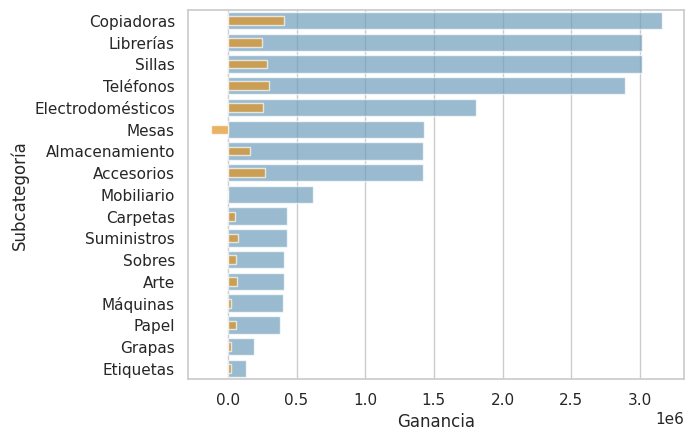

In [ ]:
#Gráfica horizontal ordenada por ventas

order = df.groupby(['Subcategoría']).Ventas.sum().reset_index().sort_values(by='Ventas', ascending=False)['Subcategoría'].unique()

c_ventas = ['#629fca']*df['Subcategoría'].nunique()
c_ganancias = ['#ff9900']*df['Subcategoría'].nunique()

sns.barplot(data=df, y='Subcategoría', x='Ventas', label='Ventas',
            estimator='sum',alpha=0.7, errorbar=None,order=order, palette=c_ventas)
sns.barplot(data=df, y='Subcategoría', x='Ganancia', label='Ventas',
            estimator='sum',alpha=0.7, width=0.4, errorbar=None,
            order=order, palette=c_ganancias)
plt.show()

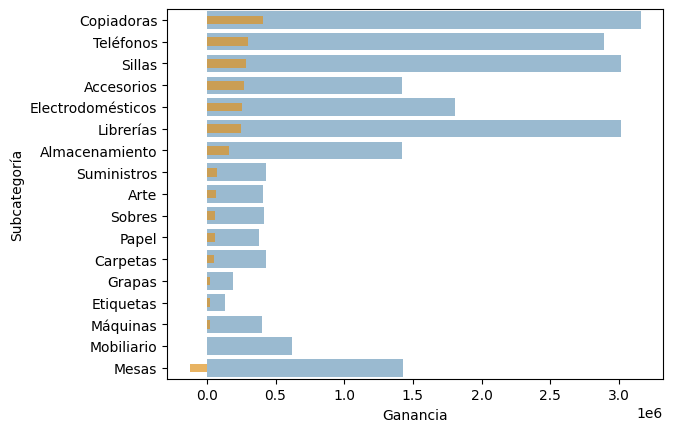

In [ ]:
#Gráfica horizontal ordenada por ganancia

order2 = df.groupby(['Subcategoría']).Ganancia.sum().reset_index().sort_values(by='Ganancia', ascending=False)['Subcategoría'].unique()

c_ventas = ['#629fca']*df['Subcategoría'].nunique()
c_ganancias = ['#ff9900']*df['Subcategoría'].nunique()

sns.barplot(data=df, y='Subcategoría', x='Ventas', label='Ventas',
            estimator='sum',alpha=0.7, errorbar=None, order=order2, palette=c_ventas)
sns.barplot(data=df, y='Subcategoría', x='Ganancia', label='Ventas',
            estimator='sum',alpha=0.7, width=0.4, errorbar=None,
            order=order2, palette=c_ganancias)
plt.show()

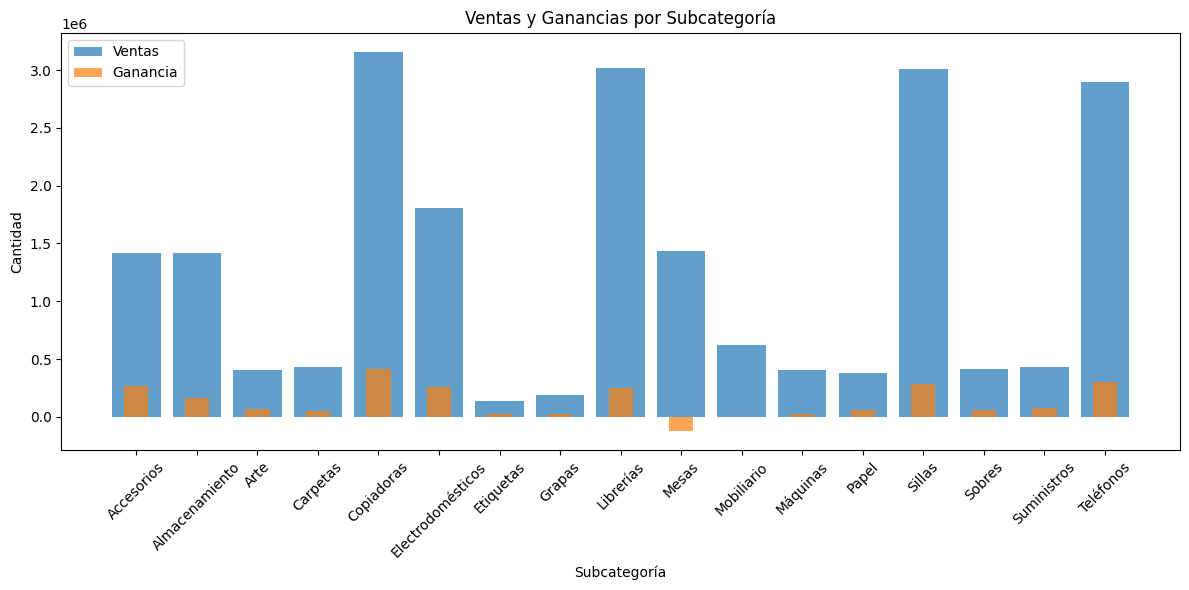

In [ ]:
#Gráfica vertical

# Agrupa por subcategoría y suma las ventas y ganancias
aggregated_data = df.groupby('Subcategoría').agg({'Ventas': 'sum', 'Ganancia': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(aggregated_data['Subcategoría'], aggregated_data['Ventas'], label='Ventas', alpha=0.7)
plt.bar(aggregated_data['Subcategoría'], aggregated_data['Ganancia'], label='Ganancia', alpha=0.7, width=0.4)
plt.title('Ventas y Ganancias por Subcategoría')
plt.xlabel('Subcategoría')
plt.ylabel('Cantidad')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

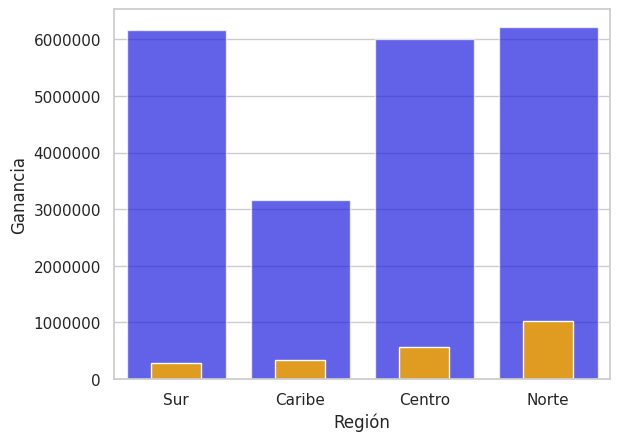

In [ ]:
#Comparativo de ventas y ganancias por región
sns.barplot(df, x='Región',y='Ventas',errorbar=None, label='Ventas',
            estimator='sum',palette=['blue']*4, alpha=0.7)
sns.barplot(df, x='Región',y='Ganancia',errorbar=None, label='Ventas',
            estimator='sum', width=0.4, palette=['orange']*4)
plt.ticklabel_format(style='plain', axis='y')

<Axes: xlabel='Ganancia', ylabel='Categoría'>

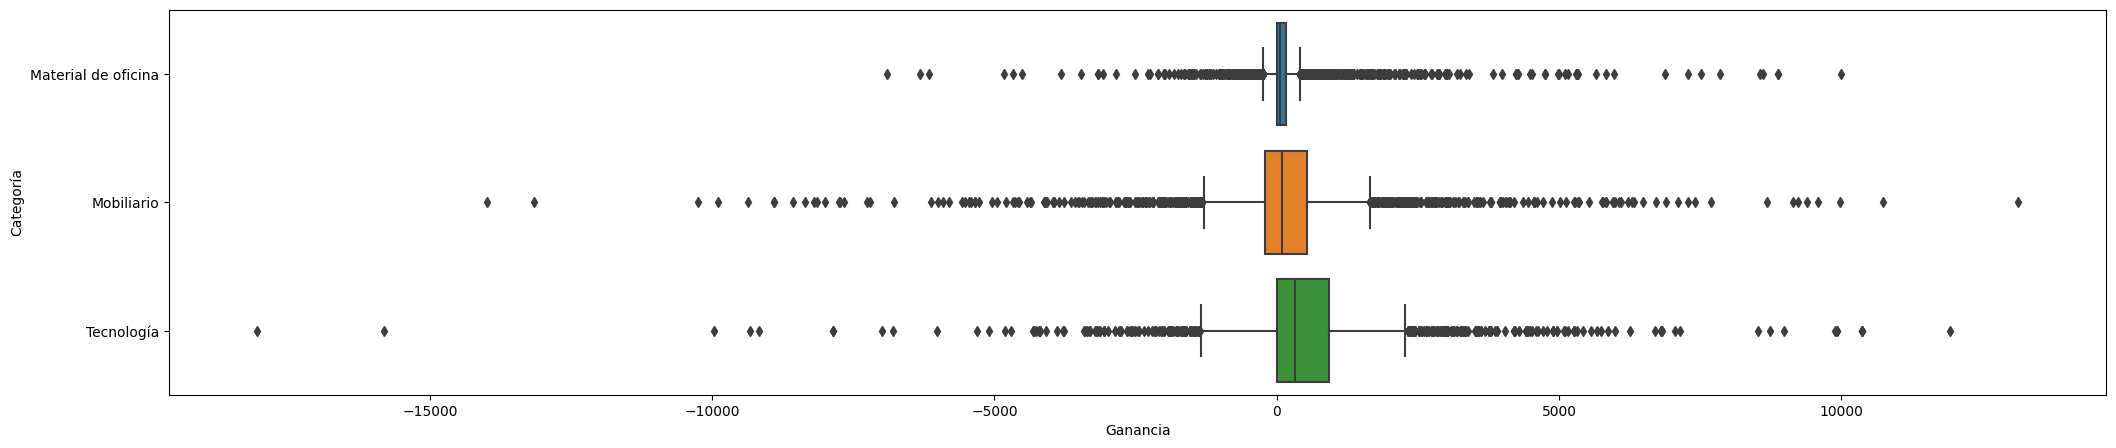

In [ ]:
#Diagrama de cajas y bigotes por ganancia
plt.figure(figsize=(25, 5))
sns.boxplot(y='Categoría', x='Ganancia', data=df)

In [ ]:
df.groupby(['Región']).agg({'Ventas':'sum','Ganancia':'sum'}).applymap(lambda x: f'{int(x):,}')


,Ventas,Ganancia
Región,,
Caribe,"3,168,507","329,798"
Centro,"6,005,100","561,646"
Norte,"6,224,653","1,027,750"
Sur,"6,169,759","282,771"


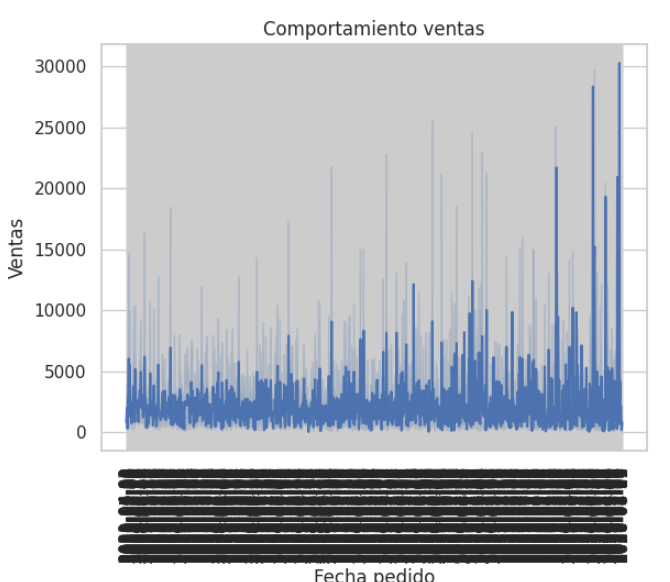

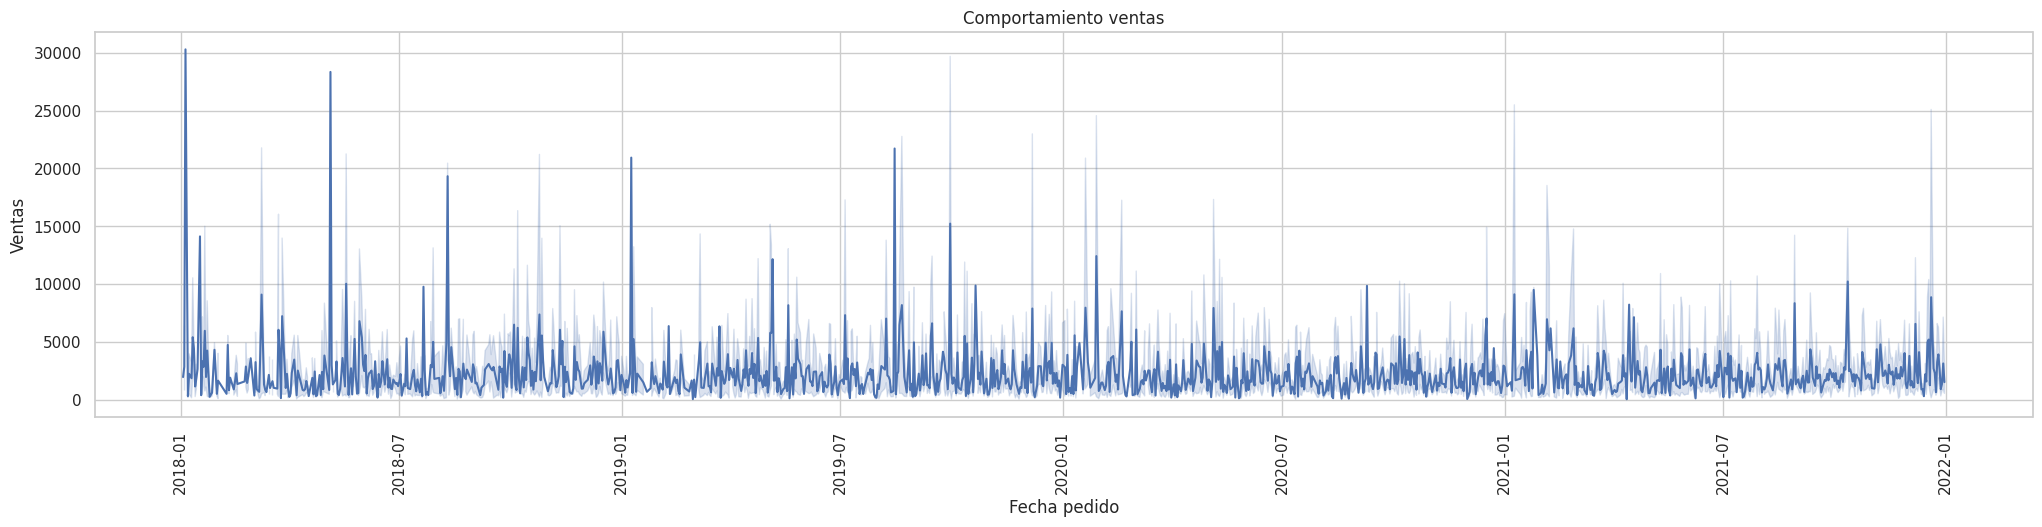

In [ ]:
#Comportamiento de ventas

plt.figure(figsize=(25,5))
sns.set(style="whitegrid")
sns.lineplot(x="Fecha del pedido", y="Ventas", data=df)
plt.xlabel("Fecha pedido")
plt.ylabel("Ventas")
plt.title("Comportamiento ventas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

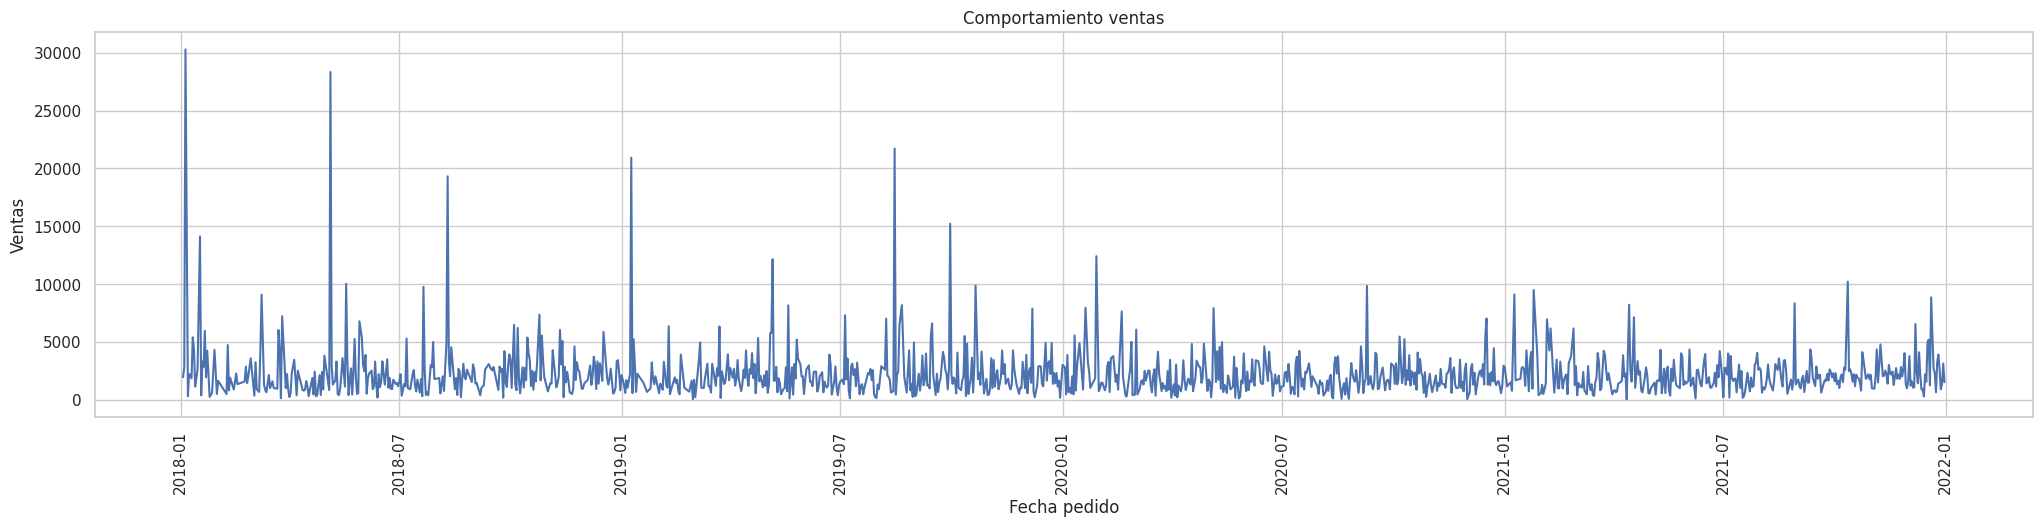

In [ ]:
#Comportamiento de ventas sin sombra de intervalo de confianza

plt.figure(figsize=(25,5))
sns.set(style="whitegrid")
sns.lineplot(x="Fecha del pedido", y="Ventas", data=df, errorbar=None)
plt.xlabel("Fecha pedido")
plt.ylabel("Ventas")
plt.title("Comportamiento ventas")
plt.xticks(rotation=90)
plt.show()

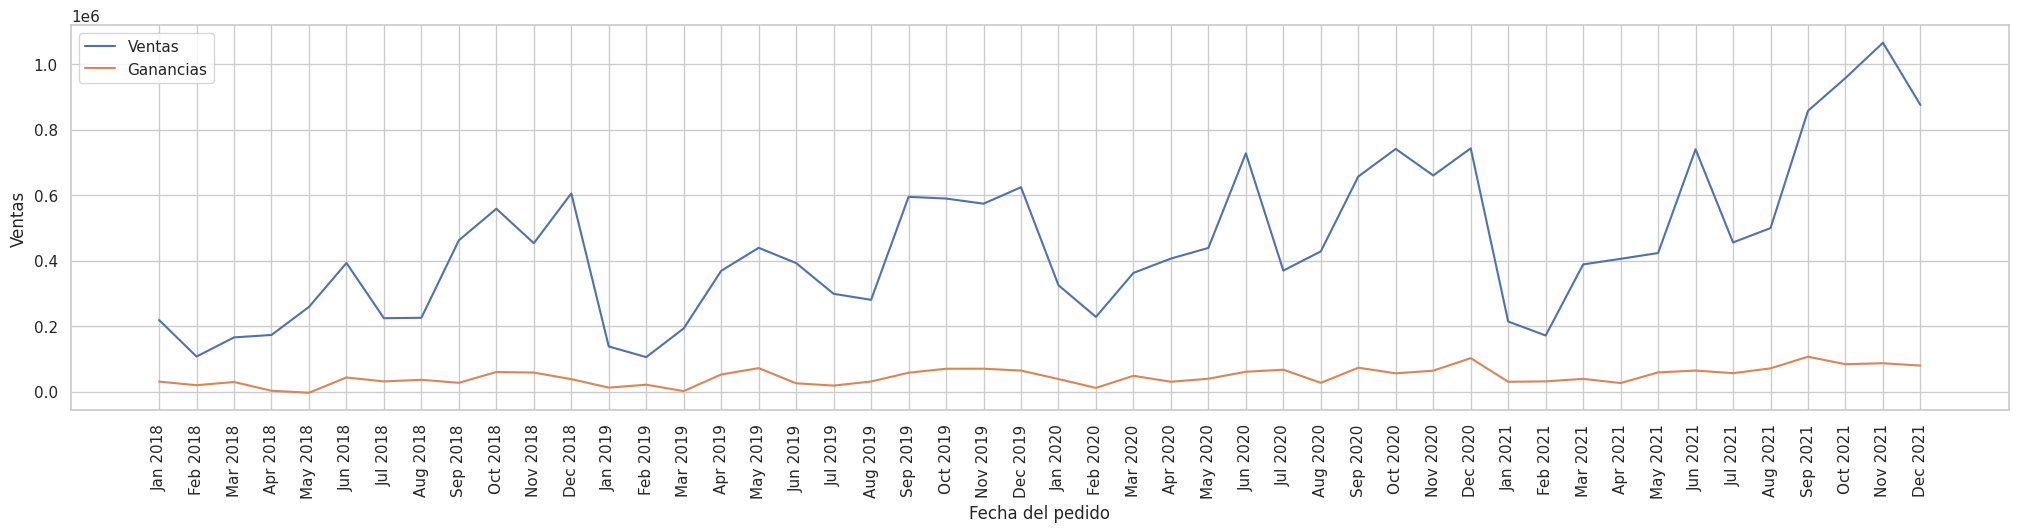

In [ ]:
#Comportamiento de ventas y ganancias

plt.figure(figsize=(25,5))
df['Fecha del pedido'] = pd.to_datetime(df['Fecha del pedido'])
df = df.sort_values(by='Fecha del pedido')
sns.lineplot(x=df['Fecha del pedido'].dt.strftime('%b %Y'),
             y="Ventas", data=df, errorbar=None,estimator='sum',label='Ventas')
sns.lineplot(x=df['Fecha del pedido'].dt.strftime('%b %Y'),
             y="Ganancia", data=df, errorbar=None,estimator='sum', label='Ganancias')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<Axes: xlabel='Categoría', ylabel='Cantidad'>

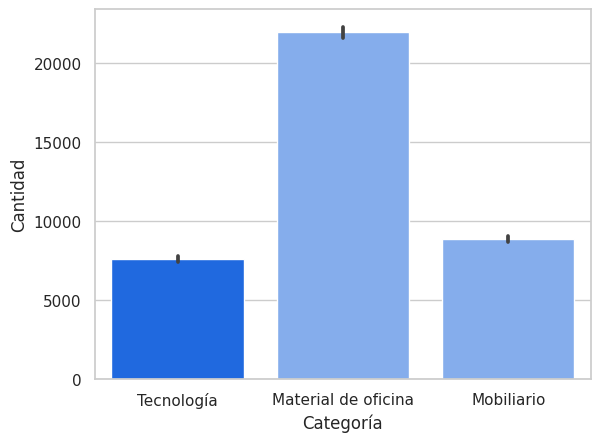

In [ ]:
#Gráfica de barras resaltando por color

sns.barplot(df, x='Categoría', y='Cantidad',estimator='sum',palette=['#0062ffff','#74a9fdff','#74a9fdff'])

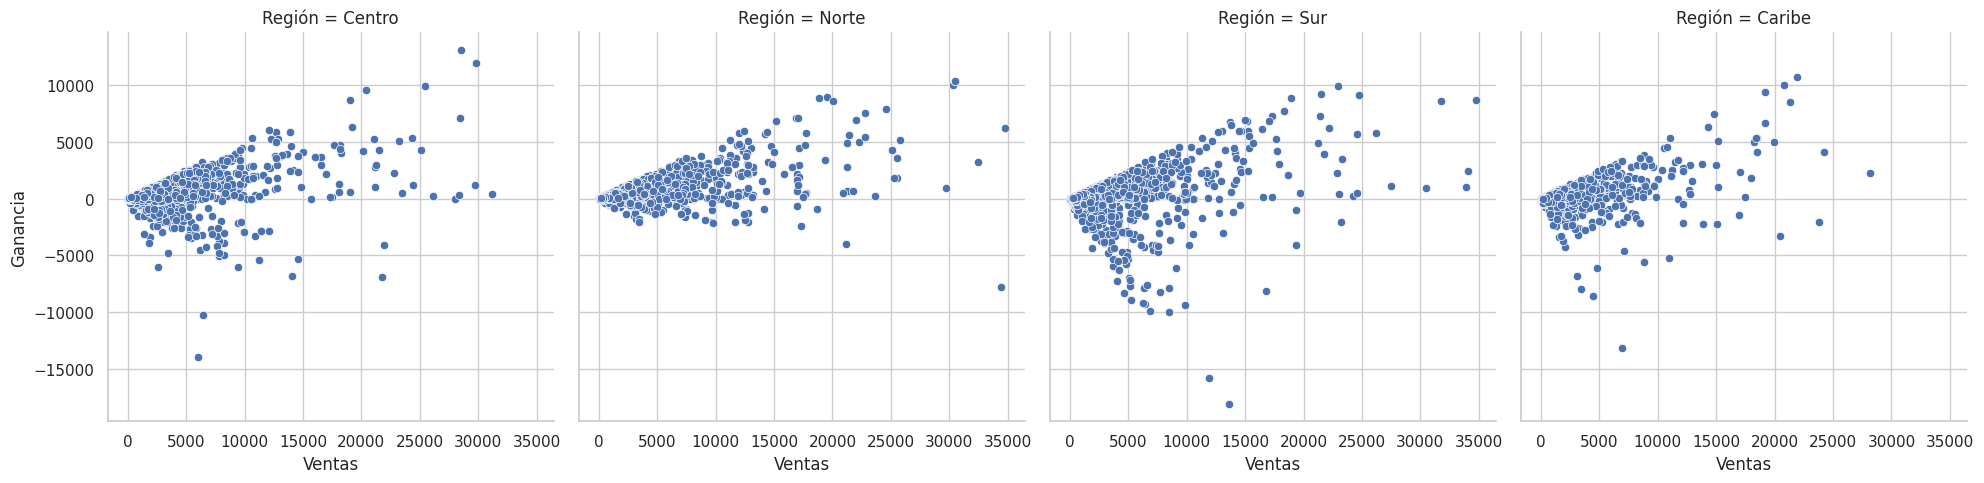

In [ ]:
#Scatterplot de ventas por ganancias por Región
sns.relplot(df, y='Ganancia', x='Ventas',
         col='Región',
         kind='scatter');

In [ ]:
#Se filtran datos de material de oficina
Oficina=df[df['Categoría']=="Material de oficina"]

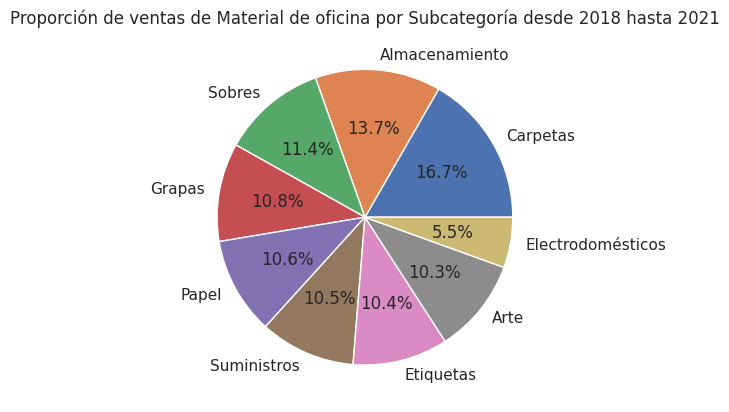

In [ ]:
#Se calcula el marketshare de cada subcategoría
ofc_graf_ = Oficina['Subcategoría'].value_counts().reset_index()
ofc_graf_

plt.pie(ofc_graf_['Subcategoría'], labels=ofc_graf_['index'], autopct='%1.1f%%')
plt.title('Proporción de ventas de Material de oficina por Subcategoría desde 2018 hasta 2021')

plt.show()

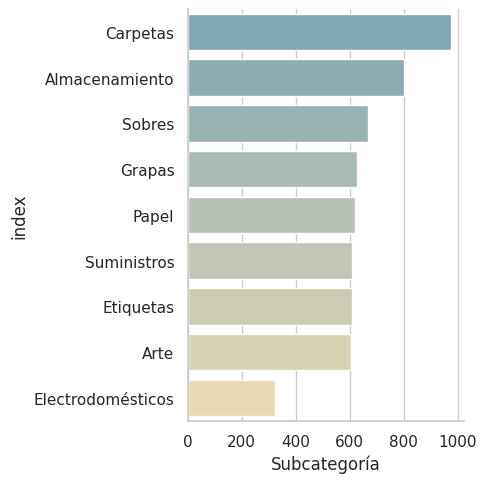

In [ ]:
#Se realiza la misma gráfica en barras.
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
datos_graf = ofc_graf_['Subcategoría'].value_counts().reset_index()
sns.catplot(kind='bar', data=ofc_graf_, y='index', x='Subcategoría', palette='blend:#7AB,#EDA')
plt.show()

#Plotly

In [ ]:
import plotly.graph_objs as go

In [ ]:
df_grouped = df.groupby(['Región']).agg({'Ventas':'sum','Ganancia':'sum'}).reset_index()
df_grouped

,Región,Ventas,Ganancia
0,Caribe,3168507.0,329798.0
1,Centro,6005100.0,561646.0
2,Norte,6224653.0,1027750.0
3,Sur,6169759.0,282771.0


In [ ]:
#Esta parece ser la opción más probable


fig = go.Figure(data=[
      go.Bar(x=df_grouped['Región'], y=df_grouped['Ventas'], name='Ventas'),
      go.Bar(x=df_grouped['Región'], y=df_grouped['Ganancia'], name='Ganancia', width=0.2)
    ])

fig.update_layout(barmode='group')
fig.show()

Calculando la diferencia no queda un valor superior pero, cuando pongo el cursor sobre la barra de ventas no muestra el valor correcto.

In [ ]:
df_grouped['Diff'] = df_grouped['Ventas'] - df_grouped['Ganancia']
df_grouped

,Región,Ventas,Ganancia,Diff
0,Caribe,3168507.0,329798.0,2838709.0
1,Centro,6005100.0,561646.0,5443454.0
2,Norte,6224653.0,1027750.0,5196903.0
3,Sur,6169759.0,282771.0,5886988.0


In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Crear una figura de barras agrupadas
fig = go.Figure()

# Agregar las barras de ventas
fig.add_trace(go.Bar(x=df_grouped['Región'], y=df_grouped['Ganancia'], name='Ventas', marker_color='blue'))

# Agregar las barras de ganancia
fig.add_trace(go.Bar(x=df_grouped['Región'], y=df_grouped['Diff'], name='Ganancia',opacity=0.7, marker_color='orange'))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Gráfico de Barras Agrupadas',
    xaxis=dict(title='Región'),
    yaxis=dict(title='relative'),
    barmode='relative',  # Usar barmode='group' para barras agrupadas
)

# Mostrar el gráfico
fig.show()
